
    
## V-мера. Практика

### <b><span style='color:#686dec'>Загружаем данные</span></b>

Используем уже знакомый нам датасет <code>make_blobs</code>


In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from itertools import cycle, islice

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [2]:
# Визуализируем исходные данные
def plot_scatter():
    plt.rcParams['figure.figsize'] = 3, 3
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], s=10,ec='k',alpha=0.25,color=colors[y_pred])

### <b><span style='color:#686dec'>Пример Кластеризации</span></b>

`Коэффициент силуэта` можно посчитать при помощи реализации из библиотеки `sklearn`

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_

# теперь посчитаем однородность
v_measure_score(labels_true=y, labels_pred=y_pred)

0.7972774344500205

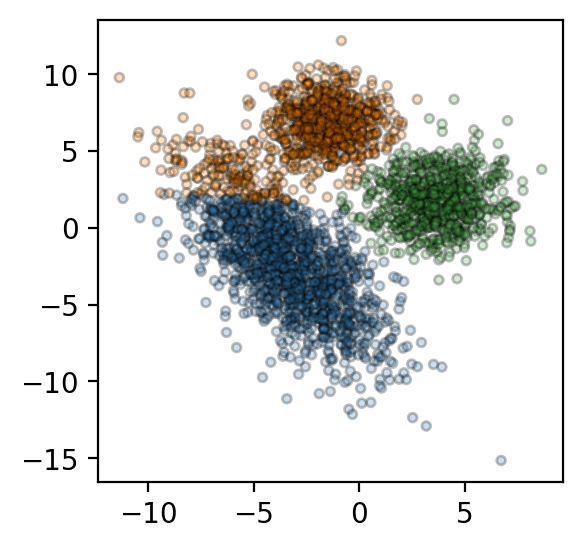

In [4]:
plot_scatter()

### <b><span style='color:#686dec'>Задание</span></b>

#### <b>Задание <span style='color:#F1A424'>4.14.1</span></b> 

- Обучите модель `GaussianMixture` с параметрами `n_components=3` и `random_state=42` на признаках исходного датасета
- Посчитайте `v-меру` для получившейся кластеризации

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# model = StandardScaler()
# X = model.fit_transform(X)

# Gaussian Mixture
em_gm = GaussianMixture(n_components=3, 
                        random_state=42)
em_gm.fit(X)       
y_pred = em_gm.predict(X)

# теперь посчитаем однородность
v_measure_score(labels_true=y, labels_pred=y_pred)

0.619672859003694

#### <b>Задание <span style='color:#F1A424'>4.14.2</span></b> 

Сравните результаты кластеризации алгоритмов `K-means`, `GaussianMixture`, `AgglomerativeClustering` и `DBSCAN` на исходном датасете при помощи `полноты`, инициализируйте алгоритмы со следующими параметрами:

- `K-means` – n_clusters=3, random_state=42
- `GaussianMixture` – n_components=3, random_state=42
- `AgglomerativeClustering` – n_clusters=3
- `DBSCAN` – eps=0.9, min_samples=35

В качестве ответа укажите максимальное значение `v-меры`, полученное при помощи данных моделей. 



In [6]:


import warnings;warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# K-Means
kmeans = KMeans(n_clusters=3,
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('kmeans',v_measure)

# Gaussian Mixture
em_gm = GaussianMixture(n_components=3, 
                        random_state=42)
em_gm.fit(X)       
y_pred = em_gm.predict(X)
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)  
print('gmm',v_measure)

# Agglomerative Cluster
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)  
print('agglomerative',v_measure)

# DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('dbscan',v_measure)

kmeans 0.7972774344500205
gmm 0.619672859003694
agglomerative 0.703747024360433
dbscan 0.7732549110297919


#### <b>Задание <span style='color:#F1A424'>4.14.3</span></b> 

Сравним модификации K-means с использованием случайной инициализации центроид и с использованием алгоритма K-means++ для инициализации центроид.

Для этого обучим на исходном датасете 2 модели K-means со следующими параметрами:

- `n_clusters`=3, `init`='k-means++', `n_init`=1, `random_state`=42
- `n_clusters`=3, `init`='random', `n_init`=1, `random_state`=42


В качестве ответа укажите максимальное значение `v-меры`, полученное при помощи данных моделей. 

In [7]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

print('initialisation test')

# K-Means hyperparameters #1
kmeans = KMeans(n_clusters=3,
                n_init=1,
                init='k-means++',
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('kmeans++',round(v_measure,3))

# K-Means hyperparameters #1
kmeans = KMeans(n_clusters=3,
                n_init=1,
                init='random',
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('random',round(v_measure,3))

initialisation test
kmeans++ 0.599
random 0.788


#### <b>Задание <span style='color:#F1A424'>4.14.4</span></b> 

- Теперь сравним `K-means` с ещё одной модификацией – `K-means mini batch`. 
- Воспользоваться реализацией K-means mini batch в библиотеке sklearn можно следующим образом:

```python
fromsklearn.clusterimport MiniBatchKMeans

kmeans_mini_batch = MiniBatchKMeans(n_clusters=
3, random_state=
42)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_
```

- Механизм кластеризации версии K-means mini batch схож с оригинальной версией алгоритма. 
- Обучите на исходном датасете две модели:


- K-means с параметрами n_clusters=3, n_init=1, random_state=42
- MiniBatchKMeans с параметрами n_clusters=3, n_init=1, random_state=42


- В качестве ответа введите максимальное значение `v-меры`, полученное при помощи данных моделей. 
- В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. 

In [8]:
from sklearn.cluster import MiniBatchKMeans

# K-Means hyperparameters #1
kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_
v_measure = v_measure_score(labels_true=y, labels_pred=kmeans_mini_batch_pred)
print('MiniBatchKMeans',v_measure)

# K-Means hyperparameters #2
kmeans = KMeans(n_clusters=3,
                n_init=1,
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('KMeans',v_measure)

MiniBatchKMeans 0.7810452632465894
KMeans 0.5990620007488798



#### <b>Задание <span style='color:#F1A424'>4.14.5</span></b> 

- Рассмотрим агломеративную кластеризацию
- Сравним, как влияет на качество кластеризации **разный тип расстояния** между кластерами
- Обучите на исходном датасете четыре модели AgglomerativeClustering (`n_clusters=3`, меняя параметр `linkage`)

In [9]:
linkage_id = ['ward','complete','average','single']

for linkage in linkage_id:
    ac = AgglomerativeClustering(n_clusters=3,
                                 linkage=linkage)
    ac.fit(X)
    y_pred = ac.labels_.astype(np.int)
    v_measure = v_measure_score(labels_true=y,
                                labels_pred=y_pred)
    print('agglo',linkage,round(v_measure,3))

agglo ward 0.704
agglo complete 0.411
agglo average 0.539
agglo single 0.001


#### <b>Задание <span style='color:#F1A424'>4.14.6</span></b> 

Сравним, как влияет предварительный расчёт `матрицы смежности` на качество `агломеративной кластеризации`

Обучите на исходном датасете две модели AgglomerativeClustering:
- с параметром `n_clusters=3`
- с параметром `n_clusters=3` и предварительно посчитанной матрицей смежности для объектов датасета


Построить матрицу смежности можно с помощью кода:

```python
fromsklearn.neighborsimport kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=
6, include_self=
False)
connectivity = 0.5 * (connectivity + connectivity.T)
```

- В качестве ответа введите максимальное значение `v-меры`, полученное при помощи данных моделей
- В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания


In [10]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, 
                                include_self= False)
connectivity = 0.5 * (connectivity + connectivity.T)

# Standard
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)
print('standard:',round(v_measure,3))

# with connectivity
ac = AgglomerativeClustering(n_clusters=3,
                             connectivity=connectivity)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)
print('connectivity:',round(v_measure,3))


standard: 0.704
connectivity: 0.903


#### <b>Задание <span style='color:#F1A424'>4.14.7</span></b> 

Алгоритм `DBSCAN` очень требователен к параметрам: небольшое изменение в параметре `eps` или `max_samples` может изменить результат и качество кластеризации

Обучите на исходном датасете две модели `DBSCAN`:

- с параметрами `eps=0.9`, `min_samples=35`
- с параметрами `eps=0.8`, `min_samples=35`


В качестве ответа укажите максимальное значение `v-меры`, полученное при помощи данных моделей. 

В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. 

In [11]:
from sklearn.cluster import DBSCAN

# DBSCAN (eps=0.9)
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('dbscan (eps 0.9)',round(v_measure,3))

# DBSCAN (esp=0.8)
dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('dbscan (eps 0.8)',round(v_measure,3))

dbscan (eps 0.9) 0.773
dbscan (eps 0.8) 0.706


#### <b>Задание <span style='color:#F1A424'>4.14.8</span></b> 

- Особенностью алгоритма `DBSCAN` является то, что помимо кластеризации этот **алгоритм определяет выбросы** в выборке (-1)
- Посмотрим на качество кластеризации без учёта таких объектов

- Обучите на исходном датасете модель `DBSCAN` с параметрами `eps=0.9`, `min_samples=35`

- Посчитайте значение v-меры только для основных и граничных объектов выборки, 
- то есть для объектов, что не являются выбросами. Ответ округлите до сотых и запишите с точкой.

In [12]:
from numpy.random import random_sample

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('dbscan',round(v_measure,3))

base = y_pred[dbscan.core_sample_indices_] # без выбросов
base_y = y[dbscan.core_sample_indices_] # без выбросов

v_measure = v_measure_score(labels_true=base_y, labels_pred=base)
print('dbscan-core',round(v_measure,3))

dbscan 0.773
dbscan-core 0.991


#### <b>Задание <span style='color:#F1A424'>4.14.9</span></b>

Предобработка:

- В курсе мы рассмотрели две метода нормализации данных:
- `MinMax` нормализация (MinMaxScaler) — приведение данных к масштабу между 0 и 1.
- `Стандартная нормализация` (StandardScaler) — данные имеют среднее 0 и стандартное отклонение 1.


Проверим, влияет ли предобработка данных на результат кластеризации. 
- Обучите две модели `AgglomerativeClustering` с параметрами `n_clusters=3`
- на признаках исходного датасета, предварительно трансформируйте признаки при помощи `стандартной нормализации`


In [13]:
from sklearn.preprocessing import StandardScaler

model = StandardScaler()
X_sca = model.fit_transform(X)

# Standard
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)
print('без нормализации:',round(v_measure,3))

# Standard
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X_sca)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)
print('с нормализации:',round(v_measure,3)) 


без нормализации: 0.704
с нормализации: 0.908


#### <b>Задание <span style='color:#F1A424'>4.14.10</span></b>

Обучите две модели `AgglomerativeClustering` с параметрами `n_clusters=3`

- на признаках исходного датасета,
- предварительно трансформируйте признаки при помощи `MinMax` нормализации


Посчитайте `v-меру` для получившихся результатов, в качестве ответа введите наибольшее значение. 

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Standard
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)
print('без нормализации:',round(v_measure,3)) 

# Standard
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X_sca)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)
print('c нормализации:',round(v_measure,3)) 

без нормализации: 0.704
c нормализации: 0.893
